# Movie Profits Analysis 

## Overview

Microsoft has decided to create a movie studio and would like to do so in a profitable manner.  Descriptive analysis of boxoffice revenue, budget, ratings, and genres show differences in how different genres perform financially. Microsoft can use this information to decide what types of films to create. 

## Business Problem

Microsoft want to create a profitable movie studio. They want to know what types of films are currently doing the best at the box office in order to decide what films they want to create. Using data from IMDB and The Numbers, I analayzed which genres perform best in the worldwide and domestic markets, which ones more people review, and which have the highest return on investmest. This will help Microsoft enter the movie sector in a profitable manner. 

## Data Understanding

### IMDB

IMDB tracks movie titles, release year, length, and genres. They have several databases that link movies by ID. IMDB also allows users to rate movies, and keeps track of the average rating and number of reviewers per movie. 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [70]:
df_imdb_title = pd.read_csv('data/imdb.title.basics.csv.gz')
df_imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [71]:
df_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [72]:
type(df_imdb_title['genres'])
df_imdb_title['genres'][0]
#genres is just one string, so need to seperate it based on comma

'Action,Crime,Drama'

In [73]:
#adds a column with a list of each genre the movie belongs to 
len(df_imdb_title['genres'].unique()) #1086
df_imdb_title['genres_list'] = df_imdb_title['genres'].str.split(',') #returns a list
df_imdb_title.head()    

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [74]:
df_imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
df_imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [75]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### The Numbers

The Numbers tracks release date, production budget, domestic gross, and worldwide gross for movies. 

In [76]:
tnmovie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [77]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

I make a list of each genre in the database and count how many movies each genre has. I check for missing values. I drop the columns of original title as unnecessary data, and runtime minutes as it has over 31,000 data points missing. 

I remove the following genres as they have few data points: Game-Show, Short, Talk-Show, News, Musical, and Adult

In [78]:
df_imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [79]:
df_imdb_title['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Comedy,Drama,Short                 1
Mystery,Reality-TV,Thriller        1
Fantasy,History,Musical            1
Drama,War,Western                  1
Adventure,Horror,Western           1
Name: genres, Length: 1085, dtype: int64

The following section makes a list of all the genres.  This starts out as a series, then turns into a flattened list.  I then make a list of each unique genre. 

In [80]:
 

genres_list =  df_imdb_title['genres'].str.split(',')
print(len(genres_list))
print(genres_list[0:5])

def flattenNestedList(nestedList):
    '''Converts a nested list to a flat list'''
    flatListofgenres = []
    #iterate over all the elements in given list
    for elem in nestedList:
        #check if type of element s list
        if isinstance(elem, list):
            #extend th flat list by adding contents of this list
            flatListofgenres.extend(flattenNestedList(elem))
        else:
            #append the element too the list
            flatListofgenres.append(elem)
    return flatListofgenres

flattened_genres_list = flattenNestedList(genres_list)
print(flattened_genres_list[0:5])

146144
0      [Action, Crime, Drama]
1          [Biography, Drama]
2                     [Drama]
3             [Comedy, Drama]
4    [Comedy, Drama, Fantasy]
Name: genres, dtype: object
['Action', 'Crime', 'Drama', 'Biography', 'Drama']


In [81]:
unique_genres = []
for x in flattened_genres_list:
    if pd.isnull(x):
        pass
    elif x not in unique_genres:
        unique_genres.append(x)
print(unique_genres)
type(unique_genres)
    

['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Documentary', 'History', 'Mystery', 'Sci-Fi', 'Romance', 'Family', 'War', 'Music', 'Sport', 'Western', 'Musical', 'Adult', 'News', 'Talk-Show', 'Reality-TV', 'Game-Show', 'Short']


list

I count how many movies each genre has listed, and then delete the genres that do not have many data points. 

In [82]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

for genre in unique_genres:
    if type(genre) == str:
        count = countX(flattened_genres_list, genre)
        print(genre + str(count))




Action10335
Crime6753
Drama49883
Biography8722
Comedy25312
Fantasy3516
Horror10805
Thriller11883
Adventure6465
Animation2799
Documentary51640
History6225
Mystery4659
Sci-Fi3365
Romance9372
Family6227
War1405
Music4314
Sport2234
Western467
Musical1430
Adult25
News1551
Talk-Show50
Reality-TV98
Game-Show4
Short11


This section focuses on finding missing values.  I delete runtime minutes as it has too many missing vales, and delete entries without genres. 

In [83]:
df_imdb_title.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
genres_list         5408
dtype: int64

In [84]:
df_imdb_title = df_imdb_title.drop('runtime_minutes', axis=1)
df_imdb_title.isna().sum()

tconst               0
primary_title        0
original_title      21
start_year           0
genres            5408
genres_list       5408
dtype: int64

In [85]:
df_imdb_title.isna().sum()

tconst               0
primary_title        0
original_title      21
start_year           0
genres            5408
genres_list       5408
dtype: int64

In [86]:
df_imdb_title = df_imdb_title.dropna()
df_imdb_title.isna().sum()

tconst            0
primary_title     0
original_title    0
start_year        0
genres            0
genres_list       0
dtype: int64

In [87]:
df_imdb_title = df_imdb_title.drop('original_title', axis=1)
df_imdb_title.isna().sum()

tconst           0
primary_title    0
start_year       0
genres           0
genres_list      0
dtype: int64

In [88]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [89]:
df_imdb_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [90]:
#checking for placeholders
for col in df_imdb_ratings:
    print('Values for {}: \n{}\n\n'.format(col, df_imdb_ratings[col].unique))

Values for tconst: 
<bound method Series.unique of 0        tt10356526
1        tt10384606
2         tt1042974
3         tt1043726
4         tt1060240
            ...    
73851     tt9805820
73852     tt9844256
73853     tt9851050
73854     tt9886934
73855     tt9894098
Name: tconst, Length: 73856, dtype: object>


Values for averagerating: 
<bound method Series.unique of 0        8.3
1        8.9
2        6.4
3        4.2
4        6.5
        ... 
73851    8.1
73852    7.5
73853    4.7
73854    7.0
73855    6.3
Name: averagerating, Length: 73856, dtype: float64>


Values for numvotes: 
<bound method Series.unique of 0           31
1          559
2           20
3        50352
4           21
         ...  
73851       25
73852       24
73853       14
73854        5
73855      128
Name: numvotes, Length: 73856, dtype: int64>




In [91]:
df_imdb_ratings = df_imdb_ratings.drop_duplicates('tconst')

There's a very large difference between median and mean for number of votes (3523 and 49).  I filter out all entries that have less than 100 votes. 

In [92]:
numvotes_mean = df_imdb_ratings['numvotes'].mean() #3523
numvotes_median = df_imdb_ratings['numvotes'].median() #49

df_imdb_ratings_filtered = df_imdb_ratings[df_imdb_ratings['numvotes'] >= 100]
print(df_imdb_ratings_filtered['numvotes'].value_counts())
numvotesfil_mean = df_imdb_ratings_filtered['numvotes'].mean() 
numvotesfil_median = df_imdb_ratings_filtered['numvotes'].median() 


104      128
109      119
102      118
107      109
105      106
        ... 
13487      1
19632      1
17585      1
5307       1
4098       1
Name: numvotes, Length: 7254, dtype: int64


In [93]:
df_imdb_ratings_filtered.describe()

,averagerating,numvotes
count,28753.000000,2.875300e+04
mean,5.907015,9.008150e+03
std,1.356642,4.804270e+04
min,1.000000,1.000000e+02
25%,5.100000,2.020000e+02
50%,6.100000,4.650000e+02
75%,6.900000,1.663000e+03
max,9.900000,1.841066e+06


### Genre

I create a column for each genre and drop the genres that have few entries (game-show, short, talk-show, news, musical, and adult)

In [94]:
#add column for genre and default to false
for genre in unique_genres: 
    df_imdb_title[genre] = False
    
for index_label, row_series in df_imdb_title.iterrows():
    for genre in df_imdb_title.at[index_label, 'genres_list']:
        df_imdb_title.at[index_label, genre] = True
df_imdb_title.head()
    
     

,tconst,primary_title,start_year,genres,genres_list,Action,Crime,Drama,Biography,Comedy,...,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama","[Action, Crime, Drama]",True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama","[Biography, Drama]",False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,2018,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama","[Comedy, Drama]",False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [95]:
df_imdb_title = df_imdb_title.drop('Game-Show', axis = 1)
df_imdb_title = df_imdb_title.drop('Short', axis = 1)
df_imdb_title = df_imdb_title.drop('Talk-Show', axis = 1)
df_imdb_title = df_imdb_title.drop('News', axis = 1)
df_imdb_title = df_imdb_title.drop('Musical', axis = 1)
df_imdb_title = df_imdb_title.drop('Adult', axis = 1)


In [96]:
unique_genres.remove('Game-Show')
unique_genres.remove('Short')
unique_genres.remove('Talk-Show')
unique_genres.remove('News')
unique_genres.remove('Musical')
unique_genres.remove('Adult')

### The Numbers

I check for missing data and placeholders in The Numbers data. They use 0 as a placeholder. I remove those entries. 

In [97]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [98]:
tnmovie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [99]:
#checking for placeholders
for col in tnmovie_budgets:
    print('Values for {}: \n{}\n\n'.format(col, tnmovie_budgets[col].unique))


Values for id: 
<bound method Series.unique of 0        1
1        2
2        3
3        4
4        5
        ..
5777    78
5778    79
5779    80
5780    81
5781    82
Name: id, Length: 5782, dtype: int64>


Values for release_date: 
<bound method Series.unique of 0       Dec 18, 2009
1       May 20, 2011
2        Jun 7, 2019
3        May 1, 2015
4       Dec 15, 2017
            ...     
5777    Dec 31, 2018
5778     Apr 2, 1999
5779    Jul 13, 2005
5780    Sep 29, 2015
5781     Aug 5, 2005
Name: release_date, Length: 5782, dtype: object>


Values for movie: 
<bound method Series.unique of 0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                   

I turn the production budget, domestic gross, and worldwide gross entries into strings in order to remove the $, and then turn them back into integers or floats. 

In [100]:
tnmovie_budgets.astype({'production_budget': 'string'})
tnmovie_budgets.astype({'domestic_gross': 'string'})
tnmovie_budgets.astype({'worldwide_gross': 'string'})

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [101]:

tnmovie_budgets['production_budget'] = tnmovie_budgets['production_budget'].str.replace(',', '')
tnmovie_budgets['production_budget'] = tnmovie_budgets['production_budget'].str.replace('$', '')
tnmovie_budgets['production_budget'] = tnmovie_budgets['production_budget'].astype(int)


tnmovie_budgets['domestic_gross'] = tnmovie_budgets['domestic_gross'].str.replace(',', '')
tnmovie_budgets['domestic_gross'] = tnmovie_budgets['domestic_gross'].str.replace('$', '')
tnmovie_budgets['domestic_gross'] = tnmovie_budgets['domestic_gross'].astype(int)

tnmovie_budgets['worldwide_gross'] = tnmovie_budgets['worldwide_gross'].str.replace(',', '')
tnmovie_budgets['worldwide_gross'] = tnmovie_budgets['worldwide_gross'].str.replace('$', '')
tnmovie_budgets['worldwide_gross'] = tnmovie_budgets['worldwide_gross'].astype(float)

tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


In [102]:
(tnmovie_budgets['production_budget'].values == 0).sum()

0

In [103]:
(tnmovie_budgets['domestic_gross'].values == 0).sum()
#548

548

In [104]:
(tnmovie_budgets['worldwide_gross'].values == 0).sum() #367

367

In [105]:
index_drop = tnmovie_budgets[tnmovie_budgets['domestic_gross'] == 0].index
tnmovie_budgets.drop(index_drop, inplace = True)

In [106]:
index_drop2 = tnmovie_budgets[tnmovie_budgets['worldwide_gross'] == 0].index
tnmovie_budgets.drop(index_drop2, inplace = True)
(tnmovie_budgets['worldwide_gross'].values == 0).sum()

0

In [107]:
tnmovie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


I create new columns that count domestic gross, worldwide gross, and production budget in millions of dollars in order to make it easier to understand.  

In [108]:
tnmovie_budgets['domestic_gross_mil']=tnmovie_budgets['domestic_gross']/1000000
tnmovie_budgets['worldwide_gross_mil']=tnmovie_budgets['worldwide_gross']/1000000
tnmovie_budgets['production_budget_mil']=tnmovie_budgets['production_budget']/1000000
tnmovie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000,5234.000000,5234.000000
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,46.257466,100.761506,34.033480
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,70.296510,181.122645,42.960481
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,0.000388,0.000401,0.001100
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,4.289719,8.142571,6.500000
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,21.984223,35.438436,20.000000
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,57.565980,109.335661,45.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000


The dataset has values for future movies, so I remove those entries. 

In [109]:
df_imdb_title['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2026, 2025, 2115, 2027, 2024], dtype=int64)

In [110]:
df_imdb_title.drop(df_imdb_title[df_imdb_title['start_year'] >= 2021].index, inplace = True)          

### Merging datasets

In [111]:
df_imdb_and_budget = pd.merge(tnmovie_budgets, df_imdb_title, how = "left", 
                              left_on = 'movie', right_on = 'primary_title')

In [112]:
tnmovie_budgets.sort_values(by=['worldwide_gross'], ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,760.507625,2776.345279,425.00
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,659.363944,2208.208395,200.00
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,936.662225,2053.311220,306.00
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,678.815482,2048.134200,300.00
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,652.270625,1648.854864,215.00
...,...,...,...,...,...,...,...,...,...
5027,28,"Jan 1, 1993",Ed and his Dead Mother,1800000,673,6.730000e+02,0.000673,0.000673,1.80
5466,67,"May 11, 2018",Higher Power,500000,528,5.280000e+02,0.000528,0.000528,0.50
5769,70,"Apr 1, 1996",Bang,10000,527,5.270000e+02,0.000527,0.000527,0.01
5518,19,"Oct 13, 2005",The Dark Hours,400000,423,4.230000e+02,0.000423,0.000423,0.40


In [113]:
duplicates = df_imdb_title[df_imdb_title.duplicated(subset='primary_title')]
print(len(duplicates))
duplicates.sort_values(by='primary_title').tail(20)

9382


,tconst,primary_title,start_year,genres,genres_list,Action,Crime,Drama,Biography,Comedy,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
101675,tt5942470,Zona Franca,2016,"Documentary,Music","[Documentary, Music]",False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
52520,tt3105980,Zone,2013,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
48963,tt2914876,Zone,2013,"Documentary,Drama","[Documentary, Drama]",False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
32324,tt2215801,Zoo,2012,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
125232,tt7624934,Zoo,2018,"Comedy,Drama,Horror","[Comedy, Drama, Horror]",False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
64336,tt3688342,Zoo,2017,"Family,History,War","[Family, History, War]",False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
99511,tt5815346,Zoom,2016,"Comedy,Drama,Romance","[Comedy, Drama, Romance]",False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
104605,tt6117454,Zoom,2016,"Crime,Thriller","[Crime, Thriller]",False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113286,tt6667868,Zoom,2016,Horror,[Horror],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55644,tt3257638,Zurich,2015,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [114]:
df_imdb_title.sort_values("primary_title", inplace = True)
df_imdb_title = df_imdb_title.drop_duplicates(['primary_title'])

In [115]:
df_imdb_and_budget = pd.merge(tnmovie_budgets, df_imdb_title, how = "left", 
                              left_on = 'movie', right_on = 'primary_title')

In [116]:
df_imdb_and_budget.sort_values(by='worldwide_gross', ascending = False).head(20)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,tconst,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,760.507625,2776.345279,425.0,tt1775309,...,False,False,False,False,False,False,False,False,False,False
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,659.363944,2208.208395,200.0,tt8852130,...,False,False,False,False,True,False,False,False,False,False
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,936.662225,2053.311220,306.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,678.815482,2048.134200,300.0,tt4154756,...,False,False,True,False,False,False,False,False,False,False
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,652.270625,1648.854864,215.0,tt0369610,...,False,False,True,False,False,False,False,False,False,False
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1.518723e+09,353.007020,1518.722794,190.0,tt2820852,...,False,False,False,False,False,False,False,False,False,False
26,27,"May 4, 2012",The Avengers,225000000,623279547,1.517936e+09,623.279547,1517.935897,225.0,tt0848228,...,False,False,True,False,False,False,False,False,False,False
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,459.005868,1403.013963,330.6,tt2395427,...,False,False,True,False,False,False,False,False,False,False
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1.348258e+09,700.059566,1348.258224,200.0,tt1825683,...,False,False,True,False,False,False,False,False,False,False
259,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1.341693e+09,381.193157,1341.693157,125.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_imdb_ratings_and_budget = pd.merge(df_imdb_ratings_filtered, df_imdb_and_budget, how = "right", 
                              on ='tconst')

In [118]:
#I may need to delete these with the inner join 
df_imdb_and_budget_inner = pd.merge(tnmovie_budgets, df_imdb_title, how = "inner", 
                              left_on = 'movie', right_on = 'primary_title')
df_imdb_and_budget_inner.shape

(2047, 35)

In [119]:
df_imdb_ratings_and_budget_inner = pd.merge(df_imdb_ratings_filtered, df_imdb_and_budget, how = "inner", 
                              on ='tconst')
df_imdb_ratings_and_budget_inner.shape

(1526, 37)

In [120]:
df_imdb_ratings_and_budget_inner.head(15)

,tconst,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
0,tt1043726,4.2,50352,42,"Jan 10, 2014",The Legend of Hercules,70000000,18848538,58953319.0,18.848538,...,False,False,False,False,False,False,False,False,False,False
1,tt1094666,7.0,1613,50,"Mar 21, 2008",The Hammer,850000,442638,442638.0,0.442638,...,False,False,False,False,False,False,False,True,False,False
2,tt1171222,5.1,8296,38,"Sep 27, 2013",Baggage Claim,8500000,21569509,22885836.0,21.569509,...,False,False,False,False,False,False,False,False,False,False
3,tt1210166,7.6,326657,15,"Sep 23, 2011",Moneyball,50000000,75605492,111300835.0,75.605492,...,False,False,False,False,False,False,False,True,False,False
4,tt1212419,6.5,87288,61,"Oct 15, 2010",Hereafter,50000000,32746941,108660270.0,32.746941,...,False,False,False,True,False,False,False,False,False,False
5,tt1232829,7.2,477771,44,"Mar 16, 2012",21 Jump Street,42000000,138447667,202812429.0,138.447667,...,False,False,False,False,False,False,False,False,False,False
6,tt1243974,5.4,54646,3,"May 29, 2015",Aloha,37000000,21052030,25387091.0,21.052030,...,False,False,False,True,False,False,False,False,False,False
7,tt1261945,4.4,69199,16,"May 27, 2010",Sex and the City 2,95000000,95347692,294680778.0,95.347692,...,False,False,False,True,False,False,False,False,False,False
8,tt1270761,5.6,44490,43,"Aug 26, 2011",Don't Be Afraid of the Dark,25000000,24046682,39126427.0,24.046682,...,False,False,False,False,False,False,False,False,False,False
9,tt1499658,6.9,398695,34,"Jul 8, 2011",Horrible Bosses,35000000,117538559,212417601.0,117.538559,...,False,False,False,False,False,False,False,False,False,False


## Analysis 

In [121]:
df_imdb_ratings_and_budget.describe()

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,start_year
count,1526.000000,1.526000e+03,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000,5234.000000,5234.000000,2047.000000
mean,6.341874,1.098556e+05,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,46.257466,100.761506,34.033480,2014.131412
std,1.000444,1.633804e+05,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,70.296510,181.122645,42.960481,2.716811
min,1.600000,1.010000e+02,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,0.000388,0.000401,0.001100,2010.000000
25%,5.800000,1.144325e+04,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,4.289719,8.142571,6.500000,2012.000000
50%,6.400000,5.318500e+04,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,21.984223,35.438436,20.000000,2014.000000
75%,7.000000,1.338635e+05,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,57.565980,109.335661,45.000000,2016.000000
max,9.000000,1.841066e+06,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000,2020.000000


I create a new column that calculates the return on investment for worldwide gross. I then calculate median and mean values for production budget, domestic gross, worldwide gross, and worldwide return on investment for each genre in order to see which genres are most profitable. 

In [122]:
difference = df_imdb_ratings_and_budget['worldwide_gross'] - df_imdb_ratings_and_budget['production_budget']
df_imdb_ratings_and_budget['w_roi']=difference/df_imdb_ratings_and_budget['production_budget']
df_imdb_ratings_and_budget.head()

,tconst,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,...,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV,w_roi
0,tt1775309,NaN,NaN,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,760.507625,...,False,False,False,False,False,False,False,False,False,5.532577
1,tt1298650,6.6,447624.0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,241.063875,...,False,False,False,False,False,False,False,False,False,1.546673
2,tt6565702,6.0,24451.0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,42.762350,...,False,True,False,False,False,False,False,False,False,-0.572108
3,tt2395427,7.3,665594.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,459.005868,...,False,True,False,False,False,False,False,False,False,3.243841
4,NaN,NaN,NaN,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,620.181382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.153696


In [123]:
#calculate values for genres
genre_statistics = {}
for genre in unique_genres:
    tempdf = df_imdb_ratings_and_budget.loc[df_imdb_ratings_and_budget[genre] == True]
    productionbudgmed = tempdf['production_budget'].median()/1000000
    productionbudmean = tempdf['production_budget'].mean()/1000000
    domestic_grossmed = tempdf['domestic_gross'].median()/1000000
    domestic_grossmean = tempdf['domestic_gross'].mean()/1000000
    world_grossmed = tempdf['worldwide_gross'].median()/1000000
    world_grossmean = tempdf['worldwide_gross'].mean()/1000000
    average_ratingmean = tempdf['averagerating'].mean()
    numvotes_count = tempdf['numvotes'].sum()
    w_roi_mean = tempdf['w_roi'].mean()
    w_roi_med = tempdf['w_roi'].median()
    genre_entry = {'genre_name': genre, 'productionbudgmed': productionbudgmed, 'productionbudmean': productionbudmean,
                   'domestic_grossmed':domestic_grossmed, 'domestic_grossmean': domestic_grossmean,
                   'world_grossmed': world_grossmed, 'world_grossmean': world_grossmean, 
                   'average_rating': average_ratingmean, 'numvotes_count': numvotes_count, 'w_roi_mean': w_roi_mean,
                   'w_roi_med': w_roi_med}
    genre_statistics[genre] = genre_entry
    
del genre_statistics['Reality-TV']
genre_statistics

#add w_roi and average rating 

{'Action': {'genre_name': 'Action',
  'productionbudgmed': 53.012938,
  'productionbudmean': 76.73234007835052,
  'domestic_grossmed': 46.874505,
  'domestic_grossmean': 85.99055569690722,
  'world_grossmed': 109.73884,
  'world_grossmean': 230.40528435051544,
  'average_rating': 6.343822843822842,
  'numvotes_count': 79071466.0,
  'w_roi_mean': 2.4321390416492283,
  'w_roi_med': 1.211550170940171},
 'Crime': {'genre_name': 'Crime',
  'productionbudgmed': 25.0,
  'productionbudmean': 30.74758946062992,
  'domestic_grossmed': 20.3361375,
  'domestic_grossmean': 34.7774529488189,
  'world_grossmed': 36.8907625,
  'world_grossmean': 77.17808907086614,
  'average_rating': 6.411555555555557,
  'numvotes_count': 24594590.0,
  'w_roi_mean': 1.5892267539732166,
  'w_roi_med': 0.6637852166666667},
 'Drama': {'genre_name': 'Drama',
  'productionbudgmed': 15.0,
  'productionbudmean': 25.99286503036437,
  'domestic_grossmed': 16.928415,
  'domestic_grossmean': 33.71926440890689,
  'world_grossmed'

In [124]:
dfgenre = pd.DataFrame(genre_statistics)
dfgenretransposed = dfgenre.transpose()

In [125]:

df_imdb_ratings_and_budget_mil = df_imdb_ratings_and_budget[df_imdb_ratings_and_budget['production_budget'] >= 1000000]
df_imdb_ratings_and_budget_tenmil = df_imdb_ratings_and_budget[df_imdb_ratings_and_budget['production_budget'] >= 10000000]


In [126]:
df_imdb_ratings_and_budget.describe()



,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,start_year,w_roi
count,1526.000000,1.526000e+03,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000,5234.000000,5234.000000,2047.000000,5234.000000
mean,6.341874,1.098556e+05,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,46.257466,100.761506,34.033480,2014.131412,4.267876
std,1.000444,1.633804e+05,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,70.296510,181.122645,42.960481,2.716811,30.997659
min,1.600000,1.010000e+02,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,0.000388,0.000401,0.001100,2010.000000,-0.999875
25%,5.800000,1.144325e+04,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,4.289719,8.142571,6.500000,2012.000000,-0.241161
50%,6.400000,5.318500e+04,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,21.984223,35.438436,20.000000,2014.000000,0.961653
75%,7.000000,1.338635e+05,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,57.565980,109.335661,45.000000,2016.000000,3.059457
max,9.000000,1.841066e+06,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000,2020.000000,1799.000000


In [127]:
df_imdb_ratings_and_budget_mil.describe()

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,start_year,w_roi
count,1461.000000,1.461000e+03,4930.000000,4.930000e+03,4.930000e+03,4.930000e+03,4930.000000,4930.000000,4930.000000,1944.000000,4930.000000
mean,6.355168,1.139224e+05,50.413996,3.610936e+07,4.881030e+07,1.065073e+08,48.810302,106.507306,36.109359,2014.157922,2.629089
std,0.989387,1.656826e+05,28.984483,4.341911e+07,7.154558e+07,1.849711e+08,71.545580,184.971136,43.419113,2.728825,7.221113
min,1.600000,1.010000e+02,1.000000,1.000000e+06,3.880000e+02,6.730000e+02,0.000388,0.000673,1.000000,2010.000000,-0.999875
25%,5.800000,1.310900e+04,25.000000,8.500000e+06,6.000000e+06,1.073222e+07,6.000000,10.732225,8.500000,2012.000000,-0.211250
50%,6.400000,5.754900e+04,50.000000,2.000000e+07,2.501944e+07,3.968656e+07,25.019438,39.686557,20.000000,2014.000000,0.957011
75%,7.100000,1.401480e+05,76.000000,4.600000e+07,6.046695e+07,1.185319e+08,60.466949,118.531902,46.000000,2016.000000,2.918460
max,9.000000,1.841066e+06,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000,2020.000000,224.000000


In [128]:
df_imdb_ratings_and_budget_tenmil.describe()

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,start_year,w_roi
count,1118.000000,1.118000e+03,3614.000000,3.614000e+03,3.614000e+03,3.614000e+03,3614.000000,3614.000000,3614.000000,1472.000000,3614.000000
mean,6.383363,1.351247e+05,50.548423,4.765514e+07,6.180905e+07,1.375946e+08,61.809049,137.594638,47.655137,2014.224185,1.930864
std,0.959712,1.796569e+05,28.998855,4.549935e+07,7.834526e+07,2.060247e+08,78.345259,206.024720,45.499352,2.747475,3.810857
min,1.600000,1.010000e+02,1.000000,1.000000e+07,3.880000e+02,5.000000e+03,0.000388,0.005000,10.000000,2010.000000,-0.999808
25%,5.800000,2.335125e+04,25.000000,1.800000e+07,1.435937e+07,2.357830e+07,14.359374,23.578304,18.000000,2012.000000,-0.122192
50%,6.400000,7.751200e+04,50.000000,3.000000e+07,3.737273e+07,6.510591e+07,37.372729,65.105910,30.000000,2014.000000,0.946977
75%,7.100000,1.754232e+05,76.000000,6.000000e+07,7.619743e+07,1.629818e+08,76.197431,162.981816,60.000000,2016.250000,2.613430
max,9.000000,1.841066e+06,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000,2020.000000,74.520507


### Budget

The following graphs compare production budget with gross revenue, for domestic and worldwide audiences.  Budgets of 300 million and above come with greater risk, so I recommend starting with budgets below 200 million.  

Text(0, 0.5, 'Domestic Gross in Millions')

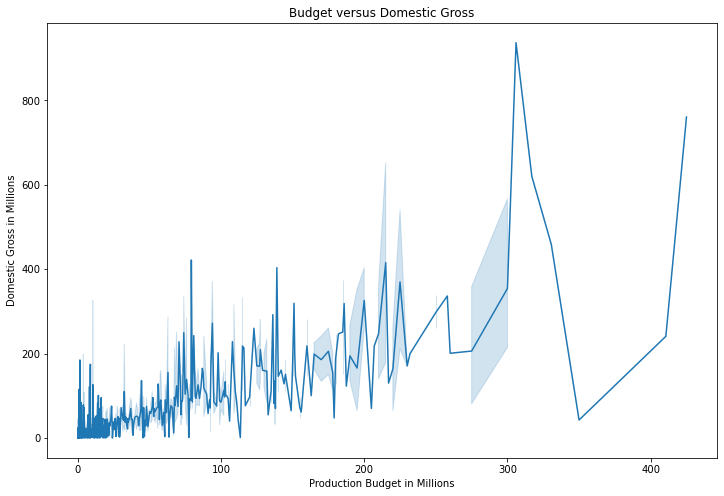

In [129]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data=df_imdb_ratings_and_budget, x="production_budget_mil", y="domestic_gross_mil")
plt.title('Budget versus Domestic Gross')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Domestic Gross in Millions')

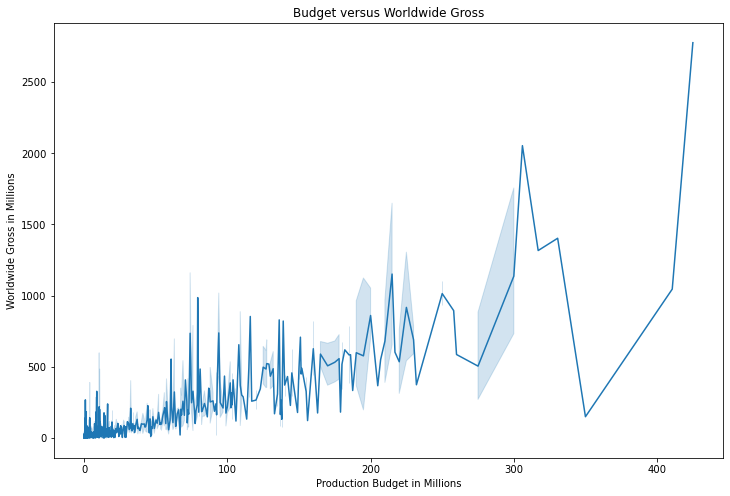

In [138]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data=df_imdb_ratings_and_budget, x="production_budget_mil", y="worldwide_gross_mil")
plt.title('Budget versus Worldwide Gross')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Gross in Millions')
plt.savefig('Images/budgetandworldwidegross')

### Genre

Adventure and Animation movies tend to have the highest budgets. 

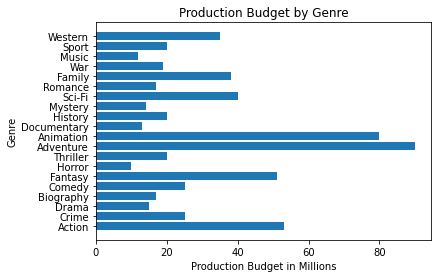

In [131]:
plt.barh(dfgenretransposed['genre_name'], dfgenretransposed['productionbudgmed'])
plt.title('Production Budget by Genre')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Genre')
plt.show()

Animation and adventure have the highest domestic gross medians, followed by family, sci-fi, and family. 

Text(0, 0.5, 'Domestic Gross Median in Millions')

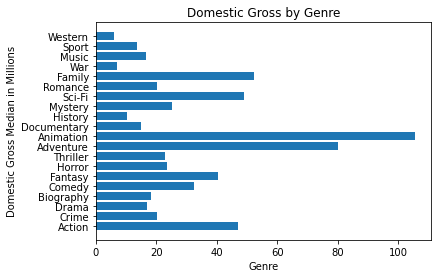

In [132]:
plt.barh(dfgenretransposed['genre_name'], dfgenretransposed['domestic_grossmed'])
plt.title('Domestic Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Domestic Gross Median in Millions')

Animation and adventure have the highest world gross medians, followed by sci-fi and action. 

Text(0, 0.5, 'World Gross Median in Millions')

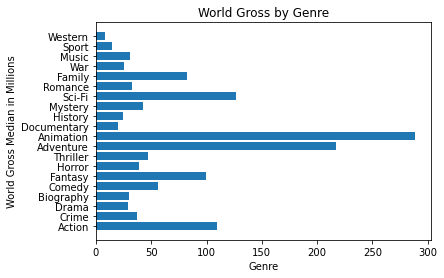

In [133]:
plt.barh(dfgenretransposed['genre_name'], dfgenretransposed['world_grossmed'])
plt.title('World Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('World Gross Median in Millions')

Animation, adventure, and sci-fi are the three highest performing genres in the worldwide market, with median worldwide gross values significantly higher than median production budgets.  Median domestic gross for adventure is below the median production budget, and the median domestic gross for animation is only slightly higher than median production budget.  Therefore, we should focus on releasing movies worldwide. 

In addition, horror movies have very low production budgets but high domestic and world gross revenue.  For this reason, I recommend also making movies in the horror genre. 

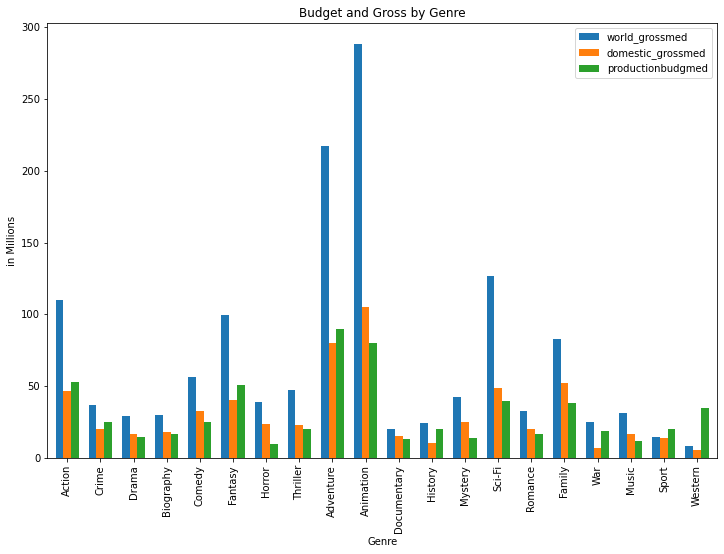

In [134]:
dfgenretransposed.plot(x="genre_name", y=["world_grossmed", "domestic_grossmed", "productionbudgmed"], kind = "bar", width = .7, figsize = (12,8))
plt.title('Budget and Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('in Millions')
plt.savefig('Images/budgetandgrossbygenre')

### Worldwide Return on Investment

Horror and Animation have the highest median worldwide return on investments, followed by adventure, mystery, and sci-fi.  

Western, sports movies, and history movies have very low worldwide return on investments. Therefore, we should refrain from making movies in those genres. 

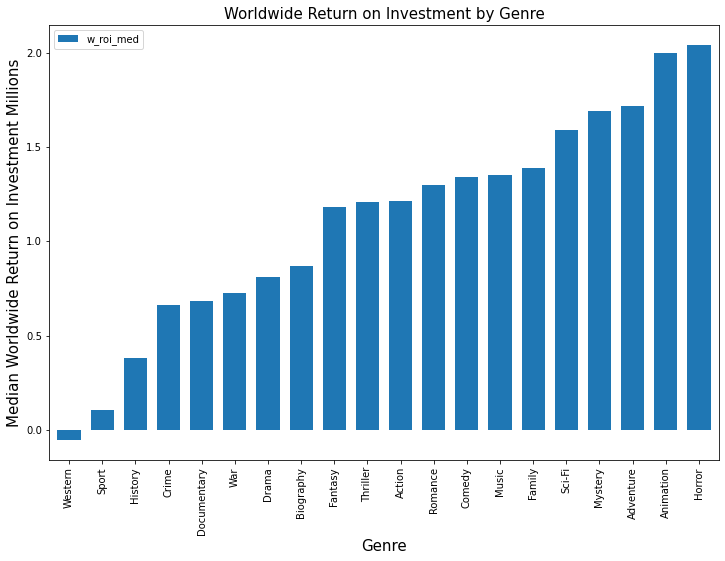

In [139]:
dfgenretransposed = dfgenretransposed.sort_values(by=['w_roi_med'])
dfgenretransposed.plot(x="genre_name", y="w_roi_med", kind = "bar", width = .7, figsize = (12,8))
plt.title('Worldwide Return on Investment by Genre', fontsize = 15)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Median Worldwide Return on Investment Millions', fontsize = 15)
plt.savefig('Images/worldwideroi')

### Ratings and Reviewers

Genres with the highest ratings are not the same as genres with the highest revenues.  

Text(0, 0.5, 'Average Rating')

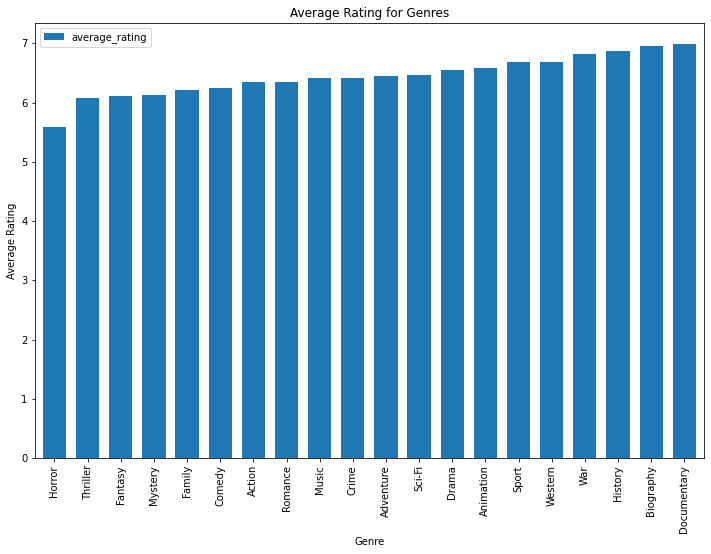

In [136]:
dfgenretransposed = dfgenretransposed.sort_values(by=['average_rating'])
dfgenretransposed.plot(x="genre_name", y='average_rating', kind = "bar", width = .7, figsize = (12,8))
plt.title('Average Rating for Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')


Action, drama, and adventure movies have a much higher number of reviewers than other genres. 

Text(0, 0.5, 'Number of Reviewers')

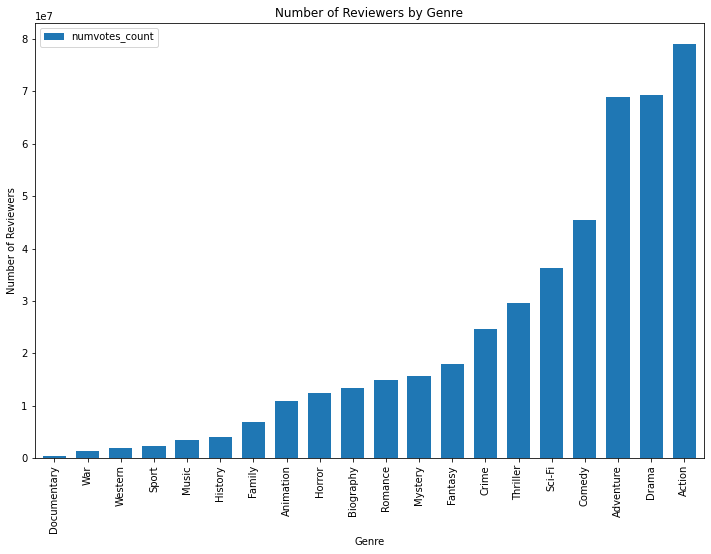

In [137]:
dfgenretransposed = dfgenretransposed.sort_values(by=['numvotes_count'])
dfgenretransposed.plot(x="genre_name", y='numvotes_count', kind = "bar", width = .7, figsize = (12,8))
plt.title('Number of Reviewers by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Reviewers')

## Conclusions

This analysis leads the following conclusions for entering the movie market:
* **Focus on releasing movies to a worldwide audience instead of just domestically.**  Gross revenues were much higher worldwide.  Domestic revenues were often just above production budget, or even below it. 
* **Focus on creating animation, adventure, and sci-fi movies.** These movies generate high box office revenue for the worldwide market.  However, adventure movies are riskier domestically. 
* **In addition, make horror movies.**  Horror movies require relatively low budgets and generate a very high return on investment both domestically and worldwide. 
* **Keep the budget at 200 million or below.** Budgets higher than 200 million carried greater risk. 

## Next Steps 

Further analyses could yield even greater insights into profitable movie choices. 
* Further analysis of public perception in terms of favorite movies.   
* Analysis of streaming services.  Especially in terms of today's market and COVID, research should be done regarding releasing movies to streaming services instead of or in addition to box offices.  
* Analysis of awards and whether awards correlate with profits. 
